# 🔮 Notebook 00: Introducción a la Regresión Logística

**Versión:** 2.0 | **Curso:** Machine Learning Supervisado - PECD UNI

---

## 📑 Índice
1. [Contexto y Objetivos](#1-contexto-y-objetivos) 🎯
2. [El Problema de la Línea Recta](#2-el-problema-de-la-línea-recta) 📏
3. [La Función Sigmoide](#3-la-función-sigmoide) 🧬
4. [Simulación: Aprobado vs Reprobado](#4-simulación-aprobado-vs-reprobado) 🎓
5. [Interpretación: Odds Ratio](#5-interpretación-odds-ratio) 🧠
6. [Evaluación: Más allá del Accuracy](#6-evaluación-más-allá-del-accuracy) 📊
7. [Caso de Negocio: Churn Prediction](#7-caso-de-negocio-churn-prediction) 💼
8. [Resumen y Siguiente Paso](#8-resumen-y-siguiente-paso) 🏆

---

## 1. Contexto y Objetivos

### 💼 Caso de Negocio: Fuga de Clientes (Churn)
**Contexto:** Eres Data Scientist en una empresa de Telecomunicaciones. El equipo de Retención quiere identificar qué clientes están en riesgo de cancelar su servicio.

**El Problema:** La Regresión Lineal predice números continuos (-∞ a +∞), pero tú necesitas una **probabilidad** (0% a 100%) y una **clasificación** (Se va / Se queda).

**Tu Misión:** Entender cómo la Regresión Logística transforma números en probabilidades usando la función **Sigmoide**.

### 🎯 Objetivos de Aprendizaje
1. **Clasificación vs Regresión:** Entender por qué la línea recta falla en problemas binarios.
2. **La Sigmoide:** Visualizar cómo "aplasta" cualquier número al rango [0, 1].
3. **Odds Ratio:** Interpretar coeficientes como multiplicadores de riesgo.
4. **Métricas:** Usar Matriz de Confusión y ROC-AUC en lugar de solo Accuracy.

In [1]:
# 📦 Imports y Configuración
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_auc_score, ConfusionMatrixDisplay)

# Configuración Visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


---

## 2. El Problema de la Línea Recta

Si usamos **Regresión Lineal** para predecir clases (0 o 1), la línea puede dar valores absurdos:

| Predicción | ¿Tiene Sentido? |
|------------|-----------------|
| $\hat{y} = 1.5$ | ❌ ¿Probabilidad de 150%? |
| $\hat{y} = -0.2$ | ❌ ¿Probabilidad de -20%? |
| $\hat{y} = 0.7$ | ✅ 70% de probabilidad |

**Solución:** Necesitamos una función que "aplaste" cualquier número ($-\infty$ a $+\infty$) para que quede **siempre entre 0 y 1**.

---

## 3. La Función Sigmoide

La **Sigmoide** (o función logística) es la solución:

$$ P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}} $$

Donde $z = \beta_0 + \beta_1 x$ es la combinación lineal (igual que en regresión lineal).

### 📖 Propiedades Clave
| Propiedad | Significado |
|-----------|-------------|
| Rango: $(0, 1)$ | Siempre da probabilidades válidas |
| $\sigma(0) = 0.5$ | Punto de decisión por defecto |
| Forma de "S" | Suaviza la transición entre clases |

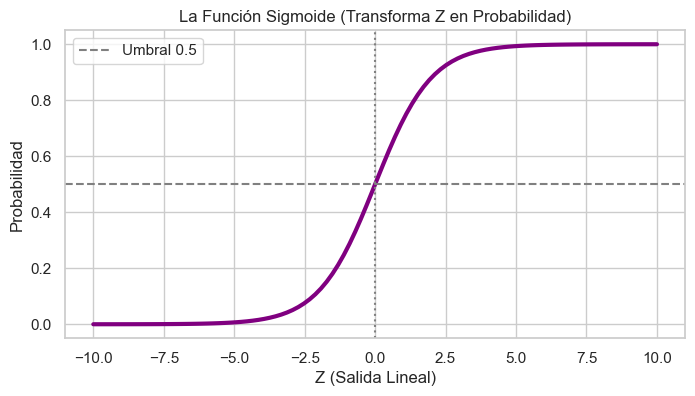

In [2]:
# Visualizando la Sigmoide
z = np.linspace(-10, 10, 100)
sigmoide = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoide, color='purple', linewidth=3)
plt.axhline(0.5, color='gray', linestyle='--', label='Umbral 0.5')
plt.axvline(0, color='gray', linestyle=':')
plt.title('La Función Sigmoide (Transforma Z en Probabilidad)')
plt.xlabel('Z (Salida Lineal)')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()


---

## 4. Simulación: Aprobado vs Reprobado

Construiremos un dataset sintético donde conocemos la "verdad":
- **X:** Horas de estudio (0 a 10)
- **y:** Aprobado (1) o Reprobado (0)

**Fórmula oculta:** $P(\text{aprobar}) = \sigma(1.5 \cdot \text{horas} - 7)$

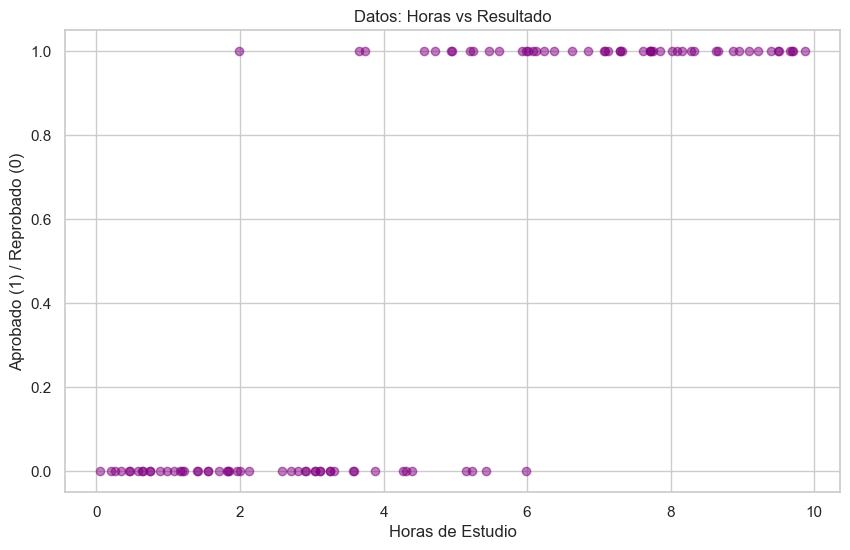

In [3]:
np.random.seed(42)
n_samples = 100

# Horas de estudio (0 a 10)
horas = np.random.uniform(0, 10, n_samples)

# Probabilidad Real (Sigmoide oculta)
prob_real = 1 / (1 + np.exp(-(1.5 * horas - 7)))

# Generar clases (0 o 1) lanzando moneda cargada
aprobado = (np.random.rand(n_samples) < prob_real).astype(int)

# Visualizar datos
plt.scatter(horas, aprobado, color='purple', alpha=0.5)
plt.xlabel('Horas de Estudio')
plt.ylabel('Aprobado (1) / Reprobado (0)')
plt.title('Datos: Horas vs Resultado')
plt.show()


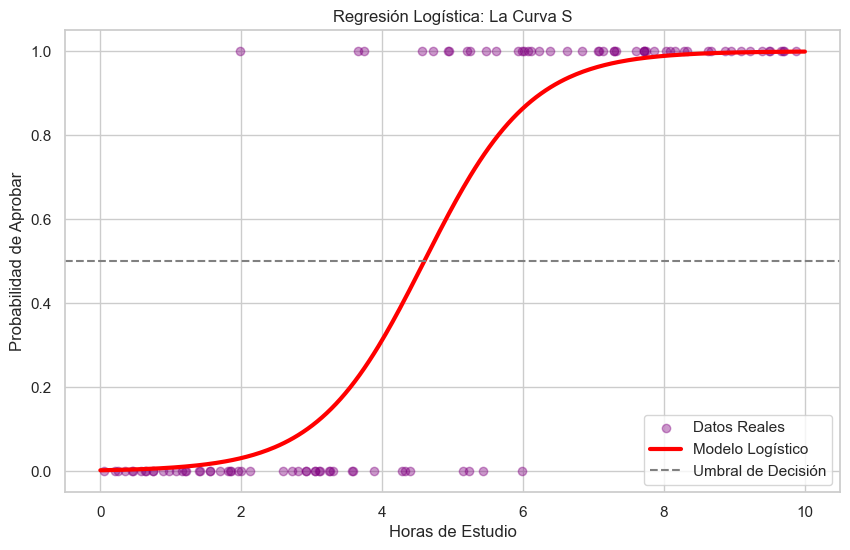

In [4]:
# Entrenar Modelo
X = horas.reshape(-1, 1)
y = aprobado

modelo_log = LogisticRegression()
modelo_log.fit(X, y)

# Visualizar curva aprendida
X_test = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob = modelo_log.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(horas, aprobado, color='purple', alpha=0.4, label='Datos Reales')
plt.plot(X_test, y_prob, color='red', linewidth=3, label='Modelo Logístico')
plt.axhline(0.5, color='gray', linestyle='--', label='Umbral de Decisión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Probabilidad de Aprobar')
plt.title('Regresión Logística: La Curva S')
plt.legend()
plt.show()


---

## 5. Interpretación: Odds Ratio

### ¿Qué significa el coeficiente $\beta$?

| Modelo | $\beta$ significa... |
|--------|---------------------|
| **Regresión Lineal** | Cuánto **aumenta** $y$ por cada unidad de $x$ |
| **Regresión Logística** | Cuánto aumenta el **Log-Odds** |

### 📐 De Log-Odds a Odds Ratio
El **Odds Ratio** ($e^\beta$) es más interpretable:

| Valor de $e^\beta$ | Interpretación |
|--------------------|----------------|
| $e^\beta > 1$ | La probabilidad **aumenta** |
| $e^\beta = 1$ | Sin efecto |
| $e^\beta < 1$ | La probabilidad **disminuye** |

In [5]:
beta = modelo_log.coef_[0][0]
odds_ratio = np.exp(beta)

print(f"Coeficiente (Beta): {beta:.2f}")
print(f"Odds Ratio (e^Beta): {odds_ratio:.2f}")
print(f"\n🧠 INTERPRETACIÓN:")
print(
    f"Por cada hora extra de estudio, los odds de aprobar se multiplican por {odds_ratio:.2f}")


Coeficiente (Beta): 1.32
Odds Ratio (e^Beta): 3.75

🧠 INTERPRETACIÓN:
Por cada hora extra de estudio, los odds de aprobar se multiplican por 3.75


---

## 6. Evaluación: Más allá del Accuracy

En problemas reales (fraude, cáncer, churn), el **Accuracy engaña**. Si solo el 5% de clientes se va, un modelo que siempre predice "Se queda" tiene 95% de accuracy... ¡pero es inútil!

### 📊 Métricas Clave
| Métrica | Qué Mide | Cuándo Usarla |
|---------|----------|---------------|
| **Matriz de Confusión** | Errores por tipo (FP, FN) | Siempre |
| **Precision** | De los que predije positivos, ¿cuántos acerté? | Cuando FP es costoso |
| **Recall** | De los positivos reales, ¿cuántos detecté? | Cuando FN es costoso |
| **ROC-AUC** | Capacidad de discriminación | Comparar modelos |

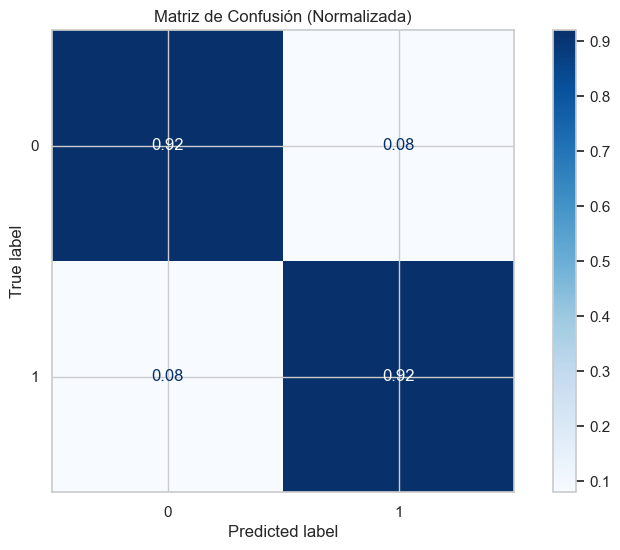

ROC-AUC Score: 0.9744


In [6]:
y_pred = modelo_log.predict(X)

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(
    modelo_log, X, y, normalize='true', cmap='Blues')
plt.title('Matriz de Confusión (Normalizada)')
plt.show()

# ROC-AUC
auc = roc_auc_score(y, modelo_log.predict_proba(X)[:, 1])
print(f"ROC-AUC Score: {auc:.4f}")


---

## 7. Caso de Negocio: Churn Prediction

Ahora aplicaremos todo a un escenario real: **predecir fuga de clientes**.

### 📂 Diccionario de Datos (Simulado)
| Variable | Descripción | Unidad |
|----------|-------------|--------|
| `Antiguedad` | Años como cliente | Años |
| `Pago` | Factura mensual promedio | Dólares |
| `Churn` | ¿Se fue el cliente? (Target) | 0=No, 1=Sí |

In [7]:
# Simulación
np.random.seed(99)
n = 200

antiguedad = np.random.randint(1, 20, n)
pago = np.random.normal(70, 20, n)

# Fórmula: Clientes nuevos y que pagan mucho se van
score = -0.3 * antiguedad + 0.05 * pago - 1
prob_churn = 1 / (1 + np.exp(-score))
churn = (np.random.rand(n) < prob_churn).astype(int)

df_churn = pd.DataFrame(
    {'Antiguedad': antiguedad, 'Pago': pago, 'Churn': churn})
df_churn.head()


,Antiguedad,Pago,Churn
0,2,84.288440,1
1,4,70.012992,1
2,9,55.334102,0
3,10,80.248746,0
4,9,72.658151,1


In [8]:
# Entrenar
X_churn = df_churn[['Antiguedad', 'Pago']]
y_churn = df_churn['Churn']

modelo_churn = LogisticRegression()
modelo_churn.fit(X_churn, y_churn)

# Interpretación con Odds Ratio
coefs = pd.DataFrame({
    'Beta': modelo_churn.coef_[0],
    'Odds Ratio': np.exp(modelo_churn.coef_[0])
}, index=['Antiguedad', 'Pago'])

coefs


,Beta,Odds Ratio
Antiguedad,-0.349232,0.705230
Pago,0.045013,1.046041


### 🧠 Interpretación de Negocio

| Variable | Odds Ratio | Interpretación |
|----------|------------|----------------|
| **Antigüedad** | < 1 | Por cada año extra, el riesgo de fuga **disminuye**. Clientes leales se quedan. |
| **Pago** | > 1 | Por cada dólar extra en factura, el riesgo **aumenta**. Clientes que pagan mucho son sensibles al precio. |

> **💡 Pro-Tip: Acción de Negocio**
> - Clientes con **poca antigüedad + pago alto** = Alto riesgo → Ofrecer descuento de retención.
> - Clientes con **mucha antigüedad** = Bajo riesgo → Upselling seguro.

### ⚠️ Real-World Warning: Desbalanceo de Clases
En la vida real, el Churn suele ser **desbalanceado** (solo 5-10% se va).

**Soluciones:**
- Usar `class_weight='balanced'` en el modelo
- Evaluar con **Recall** y **F1-Score** (no solo Accuracy)
- Técnicas de resampling (SMOTE, undersampling)

### 🧠 Micro-Desafío: Decisión de Retención

Un cliente tiene **2 años de antigüedad** y paga **\$100/mes**.

**Pregunta:** ¿Cuál es su probabilidad de fuga? ¿Le ofrecerías un descuento?

In [ ]:
# ================================
# 🧠 TU TURNO: Micro-Desafío
# ================================
cliente_nuevo = pd.DataFrame({'Antiguedad': [2], 'Pago': [100]})
prob = modelo_churn.predict_proba(cliente_nuevo)[0][1]

print(f"📊 Probabilidad de Fuga: {prob*100:.1f}%")
print(
    f"🎯 Decisión: {'⚠️ ALTO RIESGO - Ofrecer descuento' if prob > 0.5 else '✅ Bajo riesgo - No intervenir'}")


---

## 8. Resumen y Siguiente Paso

### 🏆 Resumen de Logros
¡Felicidades! En este notebook has aprendido:

1. **El Problema:** La Regresión Lineal falla en clasificación porque da valores fuera de [0, 1].
2. **La Solución:** La función Sigmoide "aplasta" cualquier número al rango de probabilidades.
3. **Interpretación:** Los coeficientes se leen como **Odds Ratio** ($e^\beta$), multiplicadores de riesgo.
4. **Evaluación:** En problemas desbalanceados, el Accuracy engaña. Usa Matriz de Confusión y ROC-AUC.

### ⚠️ Limitaciones de la Regresión Logística
- Asume **frontera de decisión lineal** (no captura patrones complejos).
- Sensible a **multicolinealidad** entre features.
- Requiere **features bien escaladas** para converger rápido.

---

### 👉 Siguiente Paso
Ahora que dominas los modelos base (Regresión Lineal y Logística), el siguiente notebook te enseñará a construir **Pipelines de Scikit-Learn** para encapsular todo el preprocesamiento y evitar errores comunes como el **Data Leakage**.

*Verás cómo profesionalizar tu código para que sea reproducible y listo para producción.*